# Data Munging

In [189]:
import pandas as pd
import numpy as np
import json

LOAN_SCHEMA = {'Agency_Code': 'str',
               'Agency_Code_Description': 'str',
               'Applicant_Income_000': 'str',
               'As_of_Year': 'int64',
               'Census_Tract_Number': 'str',
               'Conforming_Limit_000': 'float64',
               'Conforming_Status': 'str',
               'Conventional_Conforming_Flag': 'str',
               'Conventional_Status': 'str',
               'County_Code': 'str',
               'County_Name': 'str',
               'FFIEC_Median_Family_Income': 'float64',
               'Lien_Status_Description': 'str',
               'Loan_Amount_000': 'int64',
               'Loan_Purpose_Description': 'str',
               'c': 'str',
               'MSA_MD': 'str',
               'MSA_MD_Description': 'str',
               'Number_of_Owner_Occupied_Units': 'float64',
               'Respondent_ID': 'str',
               'Sequence_Number': 'int64',
               'State': 'str',
               'State_Code': 'int64',
               'Tract_to_MSA_MD_Income_Pct': 'float64'}
INSTITUTION_SCHEMA = {'Agency_Code': 'str',
                      'As_of_Year': 'int64',
                      'Assets_000_Panel': 'int64',
                      'Parent_City_TS': 'str',
                      'Parent_Name_TS': 'str',
                      'Parent_State_TS': 'str',
                      'Parent_ZIP_Code': 'str',
                      'Respondent_City_TS': 'str',
                      'Respondent_ID': 'str',
                      'Respondent_Name_TS': 'str',
                      'Respondent_State_TS': 'str',
                      'Respondent_ZIP_Code': 'str'}

In [3]:
Loan_Data= pd.read_csv('C:\Users\SPN918\Desktop\Data Challenge\Loans_data.csv', dtype=LOAN_SCHEMA,
                                na_values=['NA      ', 'NA    ', 'NA   ', 'NA', 'NA ', 'NA ', 'NaN', 'NAN', ''],
                                error_bad_lines=False, skipinitialspace=True)
Institution_Data= pd.read_csv(r'C:\Users\SPN918\Desktop\Data Challenge\Institutions_data.csv', dtype=INSTITUTION_SCHEMA,
                                       na_values=['NA      ', 'NA    ', 'NA   ', 'NA', 'NA ', 'NA ', 'NaN', 'NAN', ''],
                                       error_bad_lines=False, skipinitialspace=True)

In [4]:
def HMDA_init():
    return Loan_Data.merge(Institution_Data,how='left', on=['As_of_Year', 'Respondent_ID', 'Agency_Code'])
Expanded_HMDA=HMDA_init()

In [194]:
#defining buckets for loan amounts
def loan_buckets(data1):
        
        if data1['Loan_Amount_000'] < 100:
            return 'Small (0-100,000)'
        elif data1['Loan_Amount_000'] < 500:
            return 'Med (100,000-500,000)'
        elif data1['Loan_Amount_000'] < 1000:
            return 'Large (500,000-1000,000)'
        else:
            return 'Jumbo (1000,000-5000,000)'
        

In [196]:
#Creating buckets to group loan_amount 
Expanded_HMDA['Loan_Buckets'] = Expanded_HMDA.apply(loan_buckets, axis=1)


0                  Small (0-100,000)
1              Med (100,000-500,000)
2                  Small (0-100,000)
3              Med (100,000-500,000)
4              Med (100,000-500,000)
5              Med (100,000-500,000)
6              Med (100,000-500,000)
7                  Small (0-100,000)
8              Med (100,000-500,000)
9              Med (100,000-500,000)
10             Med (100,000-500,000)
11                 Small (0-100,000)
12             Med (100,000-500,000)
13             Med (100,000-500,000)
14             Med (100,000-500,000)
15             Med (100,000-500,000)
16             Med (100,000-500,000)
17             Med (100,000-500,000)
18             Med (100,000-500,000)
19             Med (100,000-500,000)
20             Med (100,000-500,000)
21                 Small (0-100,000)
22                 Small (0-100,000)
23             Med (100,000-500,000)
24             Med (100,000-500,000)
25                 Small (0-100,000)
26             Med (100,000-500,000)
2

In [6]:
data=Expanded_HMDA.copy()

JSON

In [192]:
#Export JSON file based on optional parameters
def hmda_to_json(data1, **kv):
    if kv is not None:
        new_data=pd.DataFrame()
        count=1
        for key, value in kv.iteritems():
            if key in list(data1.columns):
                if count==1:
                    new_data = data1[(data1[key]==value)]
                    count=count+1
                else:
                    new_data=new_data[(new_data[key]==value)]
            else:
                print key+" Invalid Argument"
                return None
        x=new_data.reset_index()
        x.drop('index',axis=1)
        x.to_json('C:\Users\SPN918\Desktop\Data Challenge\Data_Challenge_JSON_Output.json')
        return x
    else:
        x=data1.reset_index()
        x.drop('index',axis=1)
        x.to_json('C:\Users\SPN918\Desktop\Data Challenge\Data_Challenge_JSON_Output.json')
        return x

In [193]:
#Export JSON File based on optional parameters
filtered_data=hmda_to_json(Expanded_HMDA,As_of_Year=2014,Conventional_Conforming_Flag="N")

# Quality Check
Check the quality of the data in order to verify integrity ad identify bad data issues. Data Quality management is very important data mining step in order to make sure whether the values are present in the attributes that’s required to answer business question.
In order to perform quality check, following steps have been followed:
1.	Check incompleteness- check missing values
2.	Identify outliers
3.	Correctness
4.	Bad data


# 1. Missing Data

In data munging part, when multiple data sources are joined together, we might find missing values coming from sources and not in other. Here, after merging loans data with institute data on agency code, respondent id and as of year, following is the count of missing values for each variable for 1.3M records.


In [8]:
def num_missing(x):
  return sum(x.isnull())

In [9]:
Expanded_HMDA.apply(num_missing, axis=0)

Agency_Code                            0
Applicant_Income_000                   0
As_of_Year                             0
Census_Tract_Number                    0
County_Code                          837
FFIEC_Median_Family_Income          1677
Loan_Amount_000                        0
MSA_MD                             95217
Number_of_Owner_Occupied_Units      1874
Respondent_ID                          0
Sequence_Number                        0
State_Code                             0
Tract_to_MSA_MD_Income_Pct          2713
MSA_MD_Description                 95217
Loan_Purpose_Description               0
Agency_Code_Description                0
Lien_Status_Description                0
Loan_Type_Description                  0
State                                  0
County_Name                          837
Conforming_Limit_000                 837
Conventional_Status                    0
Conforming_Status                      0
Conventional_Conforming_Flag           0
Respondent_Name_

# 2. Outliers

We would like to find extra spikes in our data. In order to check outliers in loan amount, all the values with fall outside 3 standard deviations are considered outliers.

In [10]:
def loan_amount_outlier_check(data):
    
    Expanded_HMDA_without_outliers=Expanded_HMDA[np.abs(Expanded_HMDA.Loan_Amount_000-Expanded_HMDA.Loan_Amount_000.mean())<=(3*Expanded_HMDA.Loan_Amount_000.std())] 
    outlier_data=Expanded_HMDA[(np.abs(Expanded_HMDA.Loan_Amount_000-Expanded_HMDA.Loan_Amount_000.mean())>(3*Expanded_HMDA.Loan_Amount_000.std()))] 
    return Expanded_HMDA_without_outliers,outlier_data

In [11]:
without_outliers,oultier_data=loan_amount_outlier_check(data)
print oultier_data

        Agency_Code Applicant_Income_000  As_of_Year Census_Tract_Number  \
56659             9                 1395        2012             0001.00   
56685             9                 1938        2012             0001.00   
57934             9                 2391        2012             0001.00   
58554             9                 3749        2012             0041.00   
58614             9                 3840        2012             0001.00   
60992             9                 1490        2012             0013.01   
60993             9                 1490        2012             0013.01   
61464             1                 1505        2012             0008.02   
64925             9                 0810        2012             0004.00   
65115             9                 9025        2012             0041.00   
142192            9                 0900        2012             7027.02   
172812            9                 3152        2012             7059.01   
273541      

# 3. Correctness

Loan type description has two values: Conventional and non-conventional while conforming Status can take two values as: conforming and jumbo. Here, following function check whether conforming conventional loans has been correctly tagged under ‘Y’ Flag or not.


In [12]:
def conventional_conforming_Flag_check(data):
    data_with_true_flag=data[(data['Conventional_Status']=="Conventional") & (data['Conforming_Status']=="Conforming")]
    data_with_actual_flag=data[data.Conventional_Conforming_Flag=="Y"]
    if len(data_with_actual_flag.index)!=len(data_with_true_flag.index):
        print "There was a mismatch between Conventional_Conforming_Flag with Conventional and Conforming Status. "
    else:
        print "Conventional_Conforming_Flag matched with Conventional and Conforming Status."

In [13]:
conventional_conforming_Flag_check(data)

Conventional_Conforming_Flag matched with Conventional and Conforming Status.


# 4. Important Variables

One method to identify important variable is to examine how well each variable explains the variability and its impact on answering key business question. Clearly based on our objective to identify and make strategies for Change Financial in entering home loans market, three important variables which provides directional insights are:

a. Conforming_Status: In the United States, a conforming loan is a mortgage loan that conforms to GSE (Fannie Mae and Freddie Mac) guidelines. The most well-known guideline is the size of the loan, which as of 2012 based on our data was generally limited to $417 for single family homes in the continental US.

Loans above the conforming limit are known as “jumbo” loans. They are risker to lenders and down payment is usually higher. This information would be a great decisive point for small lenders while expanding their business in home loans market.

b. Loan_Type_Description: Currently, conventional mortgages represent around two-thirds of the homeowner's loans issued in the U.S. Some of the important factors to consider from consumer point of view are credit score, size of down payment, etc. So consumer prefer certain type of this loan category. Hence, from financial institution point of view, It would be good to focus not government insured loans for lesser risk involved and security.
 
c. Loan_Purpose_Description: This is the major classification in lending market and given the knowledge based dynamics in each of these categories for Refinance and Purchase, this would help Change Financial to develop different plans instead of one set common rules for both.

Further analysis and data exploration of these three variables can tell a great story about the data.


# 5. Respondent_Name_TS 

While preforming data quality check, there are two important steps: Identify issues and design strategies to remove issues and clean data. Respondent_Name_TS has following data quality issues and this looks like quality issues while data storage.
a. Trailing spaces in respondent names:  which causing same bank to be represented as multiple.
b. Format of Respondent names in inconsistent.
c. Some respondent names have FCU in their name whereas same bank appears in dataset again without FCU in its name.
d. Spelling mistakes in Names: In order to clean data above issues in variable, routine needs to be developed that verify common data issues such as whitespaces


## Market Size by State & Year

Hypothesis: Based on the decline/growth on market size from 2012 to 2014, Change Financial can enter into home loans market in the surrounding states of DC. Since It is small regional bank in DC, expansion of new home loans product other states can be profitable. 

Following graphs shows the number of loans in each state for three consecutive years. There is the decline in market from 2012 to 2014 for each of the five states. I hypothesize to look for opportunities in surrounding states. DC is not the highest emerging market right now in this business area.

And although the rate of decline in the number of loans originated, the total value of the loans varies from state to state. Over the three years in our data, despite the decline, the largest number of loans originate in Virginia than any of the other states followed by Maryland. That is, loan volume (# of Loans) originating in Virginia have consistently stayed at 54 percent of the total loans through the years while about 33 percent of the loans originate in Maryland. 
This proves my hypothesis that change Financial have good growing opportunities in these states. 

In [216]:
def plot_graphs_complex(data1,group_index,group_col,agg_col,kind,agg_type,top_ten,percent_table, graph_title):
#Create aggregate table
    from matplotlib import pyplot as plt
    
    #if(percent_table==True):
        #fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 25))
        #axes_value=axes[0]
    #else:
        #fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 25))
        #axes_value=None
    plt.subplots_adjust(top=2)
    cmap = plt.get_cmap('Set3', 11)
    
    
    agg_data1 = data1[[agg_col, group_col, group_index]] \
        .groupby([group_col,group_index]) \
        .agg({agg_col: {"Agg_col_Value":agg_type}}).reset_index()
    agg_data1.columns = [''.join(col).strip().replace(agg_col, '') for col in agg_data1.columns.values]
   
    #agg_data1 = data1[[group_index,group_col,agg_col]].pivot_table(index=group_index,columns=group_col,values=agg_col,aggfunc=agg_type)
    
    
    
    if agg_type in ('sum','count'):
        agg_type1='sum'
    if agg_type in ('median','mean'):
        agg_type1='mean'
    
     # Getting the names of the top 10 States/Counties/Metropolitan Divisions/etc by loan volume
    tops = agg_data1[["Agg_col_Value", group_index]].groupby(group_index).agg({"Agg_col_Value": agg_type1}).reset_index()
    
    tops = tops.sort_values(by="Agg_col_Value", ascending=False) \
               .iloc[:min(10, tops.shape[0]) if top_ten else None]
    #print(tops)

    tops = list(tops[group_index].unique())
    
    #Creating pivot by group_index
    agg_data3 = agg_data1.sort_values(by=["Agg_col_Value",group_index])[[group_col,"Agg_col_Value", group_index]] \
            .pivot_table(index=group_index, columns=group_col, values="Agg_col_Value")
    agg_data3=np.round(agg_data3,0)
    
    agg_data3.index = [str(x) for x in agg_data3.index]
    
    # Subsetting only rows with matching secondary group by values as in tops
    agg_data4 = agg_data3[agg_data3.index.isin(tops)]
    
    #print(agg_data4)
    
    #fig.tight_layout(pad=5)
        
    #Plot graphs
    myplot=agg_data4.plot(kind=kind, legend=True,lw=2,cmap='Set2',width=.80,fontsize=8,figsize=(10,5),title=graph_title)
    for p in myplot.patches:
        myplot.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()),fontsize=8)
    handles, labels = myplot.get_legend_handles_labels()
    lg = myplot.legend(handles, labels, bbox_to_anchor=(1.3, 1), loc=1, fontsize=10)
    #fig.tight_layout(pad=5)
    
    if(percent_table==True):
    #percentage
    
    #agg_data4 = data1[[group_index,group_col,agg_col]].pivot_table(index=group_index,columns=group_col,values=agg_col,aggfunc=agg_type)
        tmp_perc = agg_data4.apply(lambda c: np.round(c / c.sum() * 100, 2), axis=0)
        perc_plot=tmp_perc.plot.barh(stacked=True, legend=True, cmap='Dark2',title="% Share",figsize=(10,5))
   
     # Plotting a table with the percentage values
   
        tb = plt.table(cellText=tmp_perc.values,
                       colWidths=[0.3] * len(tmp_perc.columns),
                       rowLabels=tmp_perc.index+' (%)  ', colLabels=tmp_perc.columns,
                       cellLoc='center', rowLoc='center', fontsize=9)



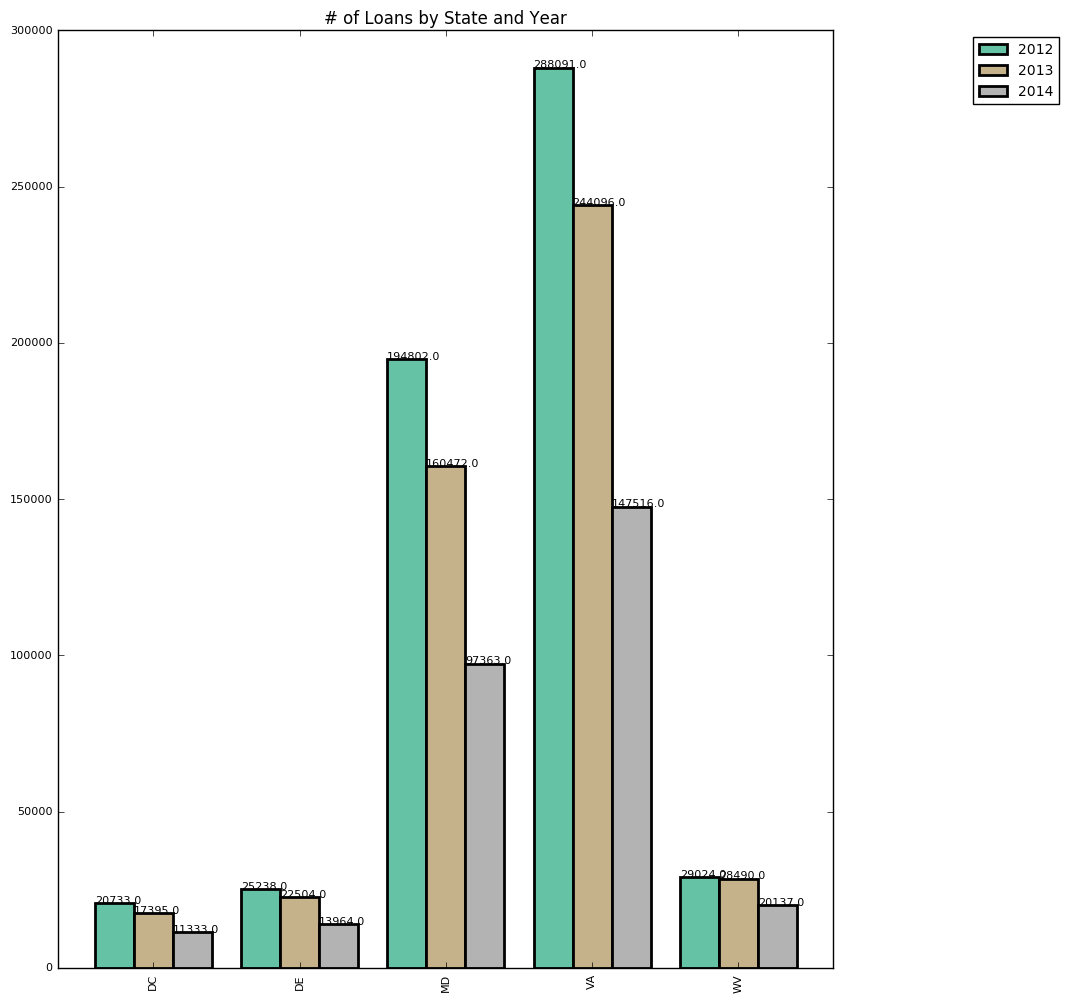

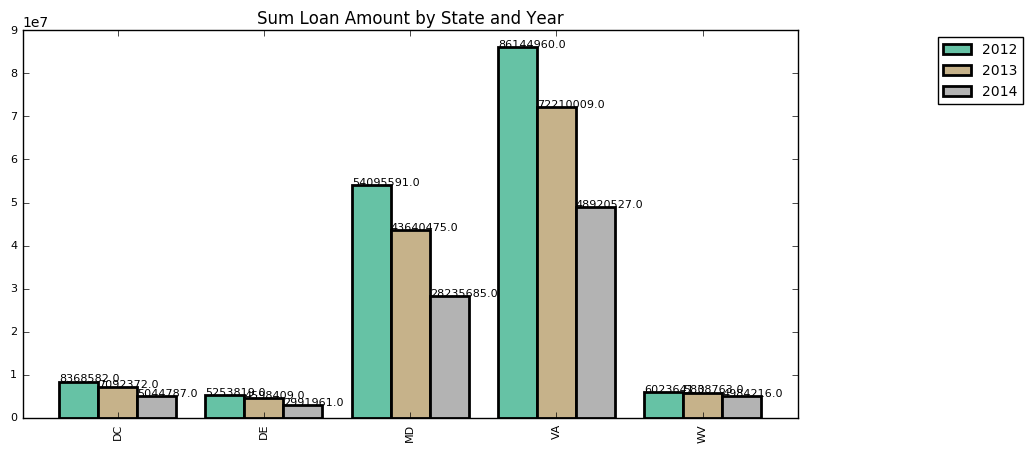

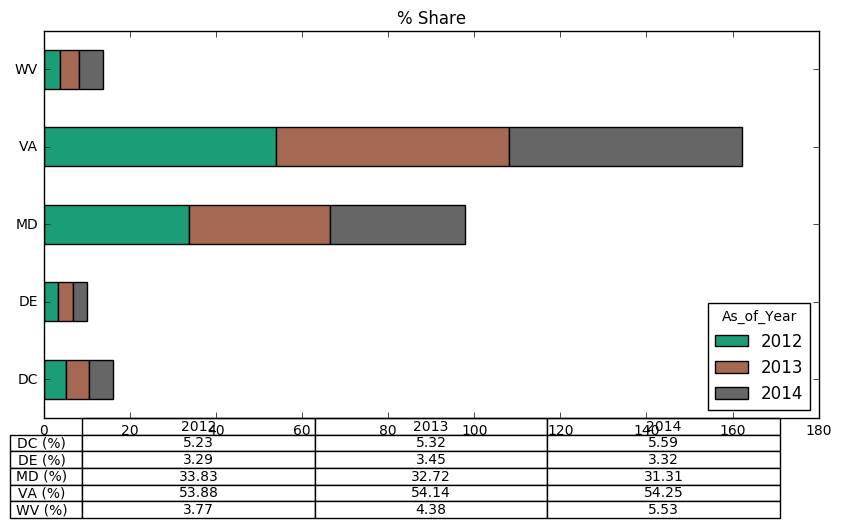

In [217]:
from matplotlib import pyplot as plt
#plot_graphs_complex(data,'Conforming_Status','As_of_Year','Conforming_Limit_000','bar','mean')
#loan amount
plot_graphs_complex(data,'State','As_of_Year','Loan_Amount_000','bar','count',True, False, '# of Loans by State and Year')
plot_graphs_complex(data,'State','As_of_Year','Loan_Amount_000','bar','sum',True, True, 'Sum Loan Amount by State and Year')
plt.show()

# Analysis
Being an information-driven culture for Change Financial, smart strategic move will be, to understand the market first and then target right audience. Lending, in home loans market, is always a risky investment (can be profitable with right strategy), so Change Financial should try and mitigate risk wherever possible.
    
    1.Understand and choose the right product
•	Change Financial has an option to choose between new homebuyers or refinance customers or both.
    
    Refinance borrowers:
    a.Rate-sensitive
    b.Willing to shop around for quotes
    c.Know what they are doing
    
    New Homebuyers:
    a.Looking for someone to guide them through the process
    b.Willing to pay more for established institutes
    c.Referral driven
    
    They should focus towards Refinance Market because of the following reasons:
    a. The loan amount would be relatively small
    b. Risk associated with this market is relatively lower as they can see the track record of the borrower before lending
    c. Considering small regional bank and low brand awareness, referrals is not a strong point at initial stage for new acquisitions.
    
    - They should target towards conforming and conventional loans because of the following reasons:
    a. Conforming loans are governed by Fannie Mae and Freddie Mac guidelines which makes them less risky. Doing so, the bank can always sell the loan to them to have enough security to work with more borrowers.
    b. Dealing with conventional loans, the bank knows that the borrower has a good credit history, stable income and can make a sizable down payment (~20%).
    
    2. Target Audience
    Having too broad of an audience will negatively impact Change Financial's investment. Above loan metrics analysis by state and year can be narrowed down to focus potential clients rather than full audience.
    -Since Change Financial is a small regional bank headquartered in Washington, DC, and has branches in surrounding states, loan volume for refinance borrowers would help decision makers to focus on 2/3 target states.
    -Since homes loans market is sensitive to area and property value, further breakdown of geographical region into top N counties/MSD helps to create focused approach.
    
    3. Strategy
    -After finding right geographical area, competitor analysis is needed in order to enter into established market to provide leading indicators for market design and offers.
    
    4. Further enhancement
    - According to survey report of consumer finance 2016 (http://files.consumerfinance.gov/f/documents/201605_cfpb_nsm-technical-report-16-01.pdf), consumer and household demographics provides deeper insights and can be used along with loans data to identify patterns based on geographies in terms of age, educational level, income, household size etc.
    -Historical HMDA data for previous few years can provide more conclusion on new home buying patterns and expansion into wider market.
    


In [173]:
def plot_graphs(data1,group_col,agg_col,kind,agg_type, graph_title):
#Create aggregate table
    from matplotlib import pyplot as plt
    import numpy as np
    agg_data = data1[[agg_col, group_col]] .groupby([group_col]) \
        .agg({agg_col: agg_type}).reset_index().sort_values(by=[group_col])
    agg_data.set_index(group_col, inplace=True)
    agg_data1=np.round(agg_data,2)
    print (agg_data)
    myplot=agg_data1.plot(kind=kind, stacked=False,legend=False,cmap='Set3',fontsize=10, title=graph_title)
    for p in myplot.patches:
            myplot.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()),fontsize=10)

In [201]:
def pie_chart(data,x,group, graph_title):
        fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
        agg_by = data[[x,group]]\
        .groupby([group]) \
        .agg({x: {'Number of loans': 'count'}})
        agg_by.columns = [''.join(col).strip().replace('Loan_Amount_000', '') for col in
                              agg_by.columns.values]
        agg_by.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=270, fontsize=8,subplots=True, cmap='Set3', title=graph_title)
        myplot=agg_by.plot(kind='bar', ax=axes[0], cmap='Set3',title=False, legend=False)
        for p in myplot.patches:
            myplot.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()),fontsize=10)


# STEP 1. Understand and choose the right product

1. Between 2012 and 2014 we can see that the share of Refinance Loans is approximately 64% of total loan volume. Assuming the trend continues and given the benefits of refinance loans and its total share in home loans market, we seem to find better opportunity window in that sector over the next few years.

2. At the same time, considering approximately 36% of the purchase loans from 2012 to 2014, marketing opportunities promoting refinance options are also strong, given the good chances of those customers considering this option, based on offer rate( which is one of the most common reason to refinance for customers) and from Change Financial's market penetration point, this would be good, due to less risk associated and empowering them to make changes to original mortgage terms.

3. Apart from loan volume, second graph which indicates 'Average Loan Amount by Loan Purpose' shows, the Average Loan Amount of ~217K for refinance, which is smaller than ~323k for purchase. Based on our early assumption, that Change Financial is considerably a smaller financial institution as compared to major ones like Capital one, Wells Fargo etc.; capturing loans with smaller average loan amount (with smaller risk and greater flexibility over loan terms) can be a good strategy in growing number of customers hence increasing the profit.

                          Loan_Amount_000
Loan_Purpose_Description                 
Purchase                       323.328435
Refinance                      271.462960


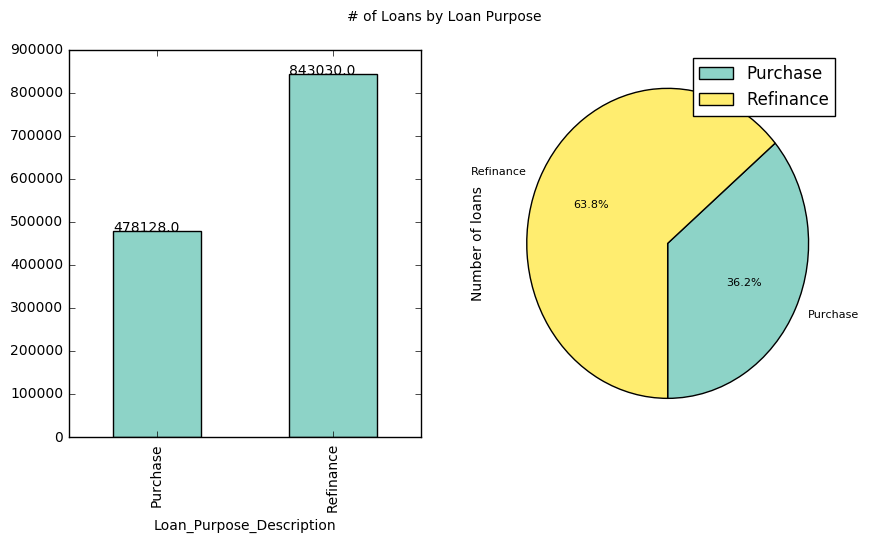

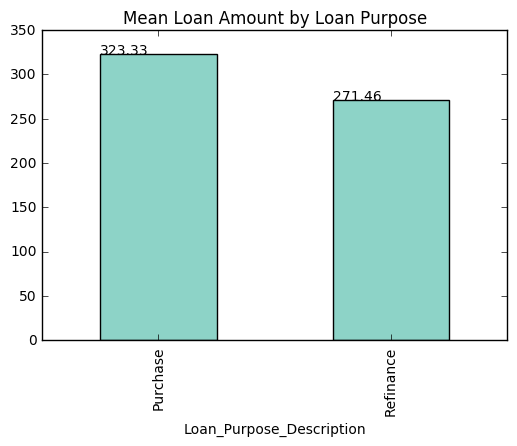

In [202]:
pie_chart(data,'Loan_Amount_000','Loan_Purpose_Description', '# of Loans by Loan Purpose')
plot_graphs(data,'Loan_Purpose_Description','Loan_Amount_000','bar','mean', 'Mean Loan Amount by Loan Purpose')
plt.show()

1. Conventional mortgages are all loans that are not made or guaranteed by the U.S. government. 
2. Conforming loans are governed by Fannie Mae and Freddie Mac guidelines which makes them less risky. 
3. Conforming mortgages are eligible for purchase by Fannie Mae (Federal National Mortgage Association) and Freddie Mac (Federal Home Loan Mortgage Corporation). Therefore, Change Financial can always sell the loan to them to have enough security to work with more borrowers.

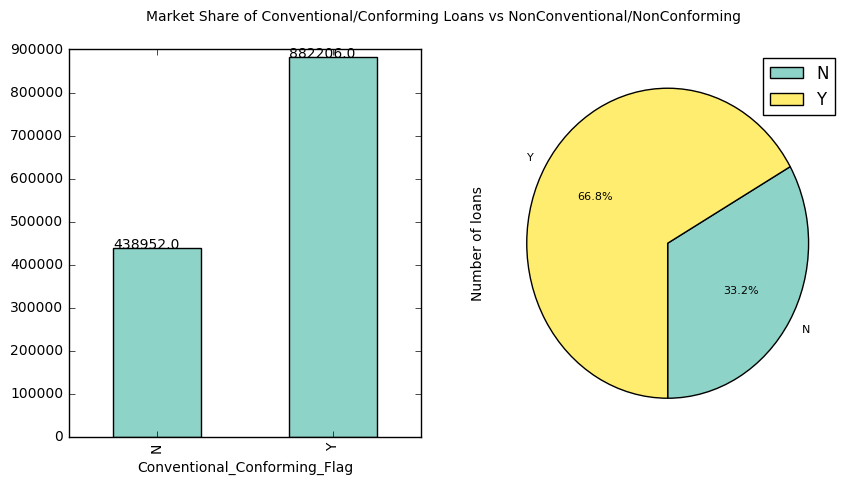

In [203]:
pie_chart(data,'Loan_Amount_000','Conventional_Conforming_Flag', 'Market Share of Conventional/Conforming Loans vs NonConventional/NonConforming')
plt.show()

~67% of the total loans are conventional conforming loans along with covering half of the total loan amounts in the homes loan market.

Looking at the distribution of share of "Conventional Conforming " refinance loans in the below graph, Change Financial will be already covering major portion of audience and at the same time less riskier ones. 

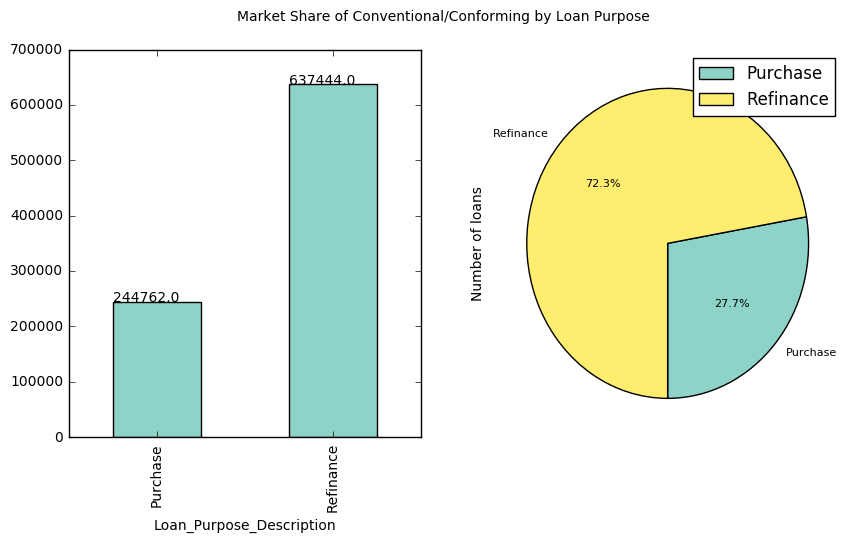

In [204]:
pie_chart(data[data.Conventional_Conforming_Flag=='Y'],'Loan_Amount_000','Loan_Purpose_Description', 'Market Share of Conventional/Conforming by Loan Purpose')
#plt.savefig('Conventional_Conforming_Flag.png')
plt.show()

# STEP 2: Target Audience

Breakdown of Conforming Conventional Refinance loans for all the states shows their market share. Considering Change Financial approach to focus on surrounding states ,  Virginia and Maryland will be good options.

Over the three years in our data, despite the decline, the largest number of loans originate in Virginia than any of the other states followed by Maryland.


       Loan_Amount_000
State                 
DC               24180
DE               30079
MD              230077
VA              316047
WV               37061


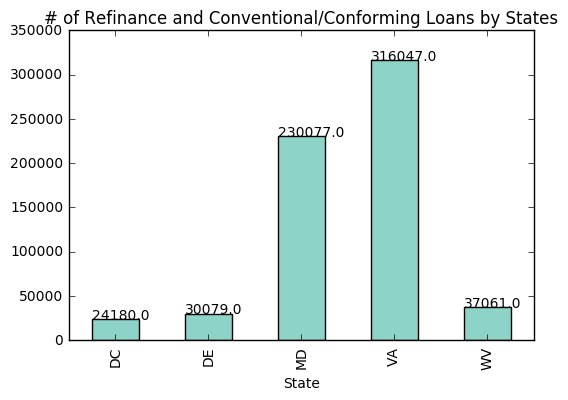

In [205]:
plot_graphs(data[(data.Conventional_Conforming_Flag=='Y') & (data.Loan_Purpose_Description=='Refinance')],'State','Loan_Amount_000','bar','count', '# of Refinance and Conventional/Conforming Loans by States')
plt.show()

Since we know Home Loans market is sensitive to location, hence we are narrowing down to the top counties in the above identified states.

Not all counties can provide us good business, we explore top 10 counties in each state of Virginia and Maryland in below graphs.
In Virginia, ~62% of the loans are concentrated in just 3 counties, similarly ~55% for Maryland. Since major portion of the loans originate in three counties in each state, we already narrowed our market geographic to much smaller and focused areas. Now it would be easier for Change Financial to target these audiences in most strategic manner.


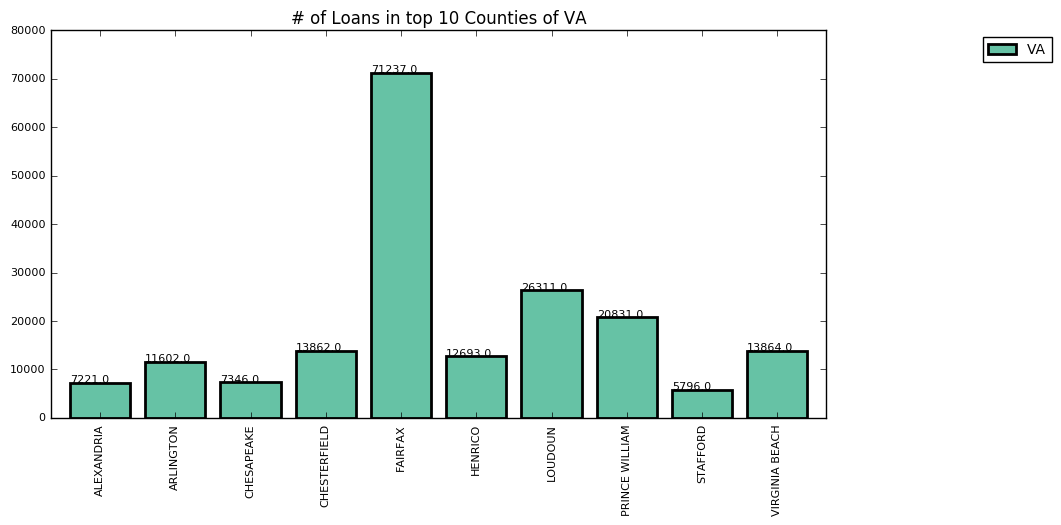

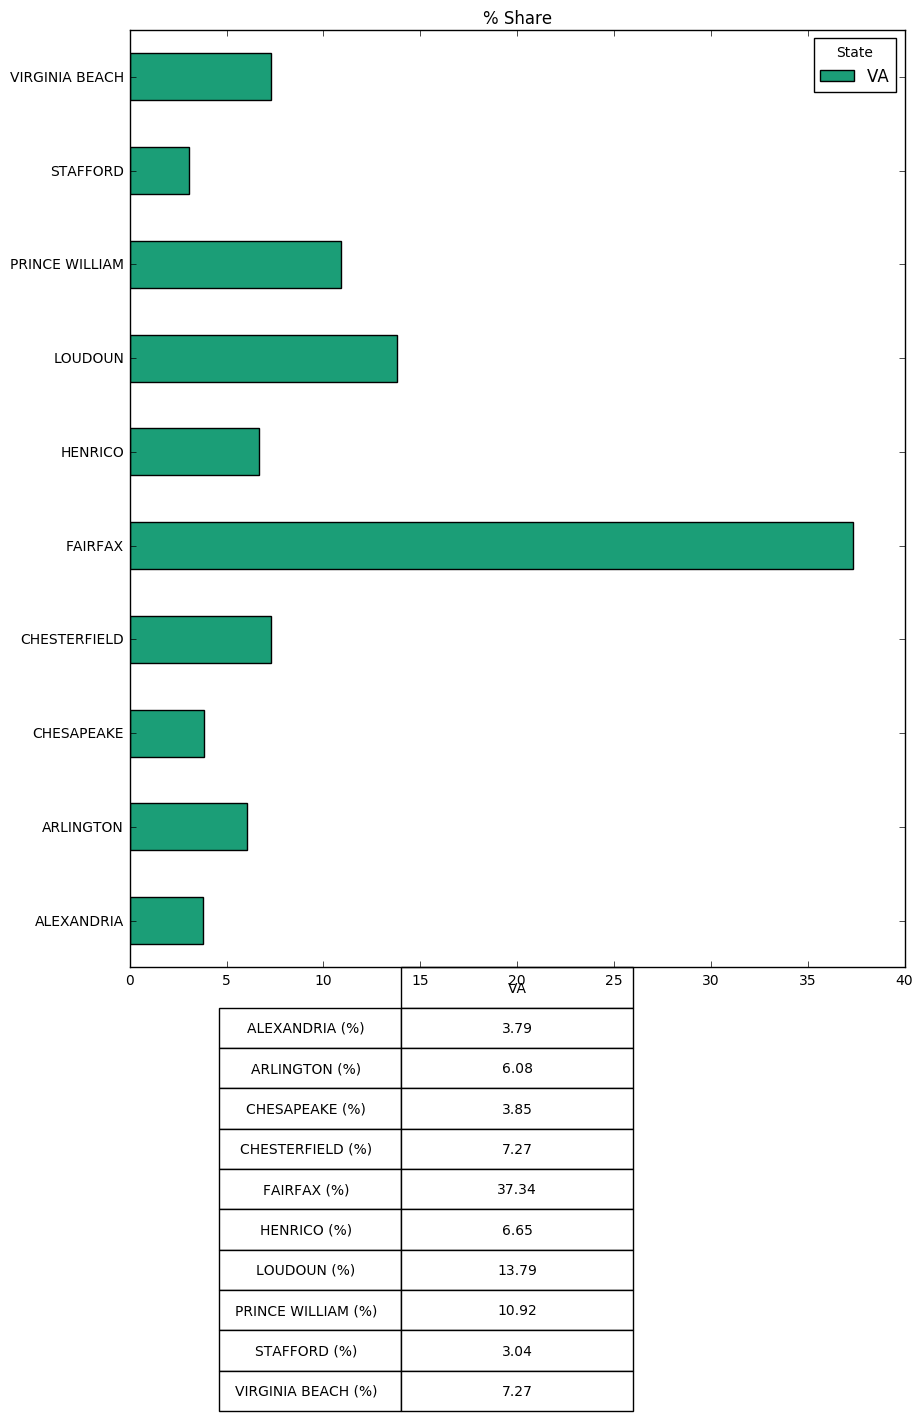

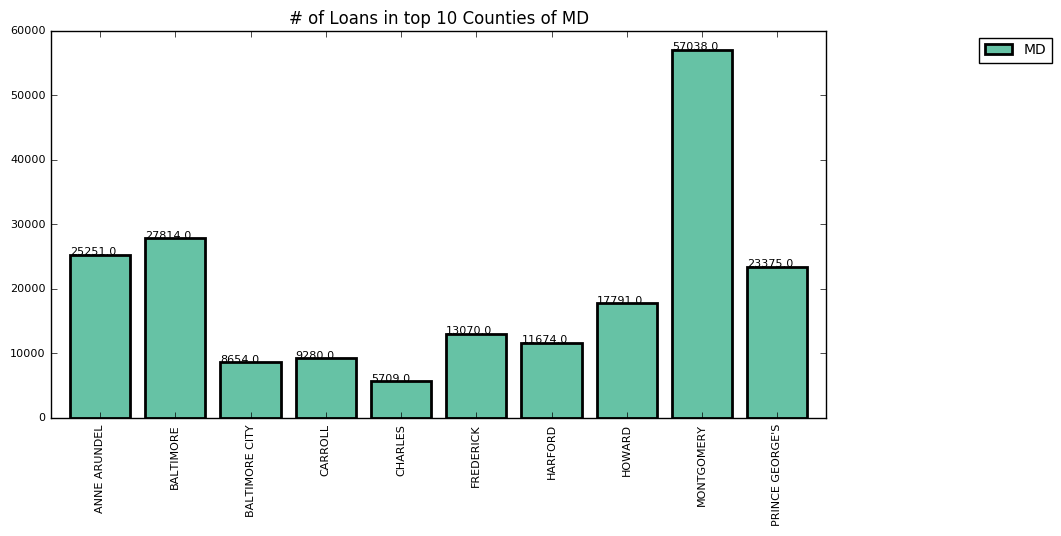

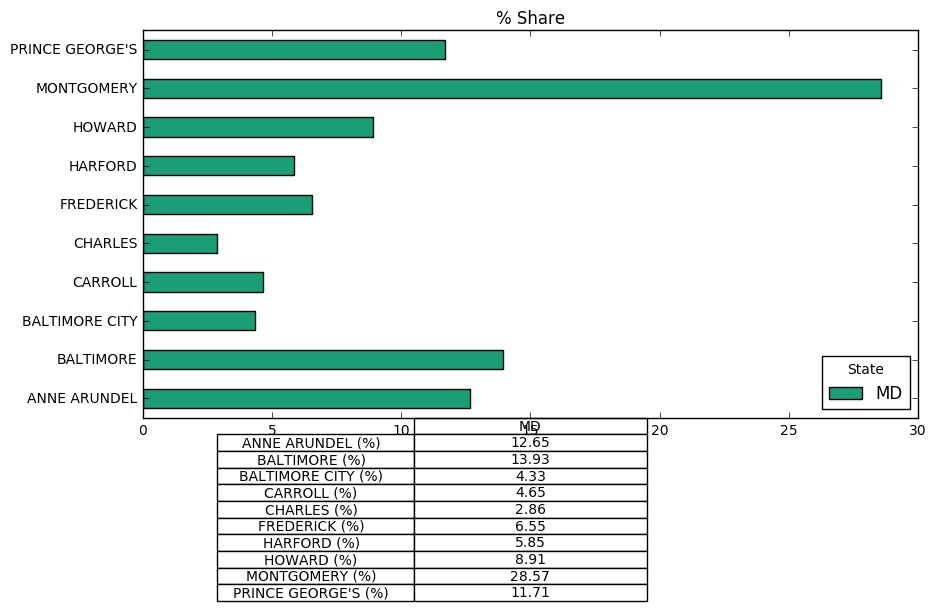

In [206]:
plot_graphs_complex(data[(data.Conventional_Conforming_Flag=='Y') & (data.Loan_Purpose_Description=='Refinance') & (data.State=='VA') ],'County_Name','State','Loan_Amount_000','bar','count',top_ten=True,percent_table=True, graph_title="# of Loans in top 10 Counties of VA")
plot_graphs_complex(data[(data.Conventional_Conforming_Flag=='Y') & (data.Loan_Purpose_Description=='Refinance') & (data.State=='MD') ],'County_Name','State','Loan_Amount_000','bar','count',top_ten=True,percent_table=True, graph_title="# of Loans in top 10 Counties of MD")
plt.show()

# Strategy

With growing number of competitors and innovative/flexible housing loans products, home loans sector has been increasingly market driven. Since Competition needs to be measured to design more aggressive plans and pricing. 

The three biggest US mortgage lenders controls ~50% of the Refinance market for conforming and conventional loans.

While maintaining competitive rates in the markets, smaller processing costs and faster processing of applications for smaller emerging banks would be an added advantage to attract borrowers.

Also, competitive analysis will help Change Financial to ultimately track down demands for refinance.

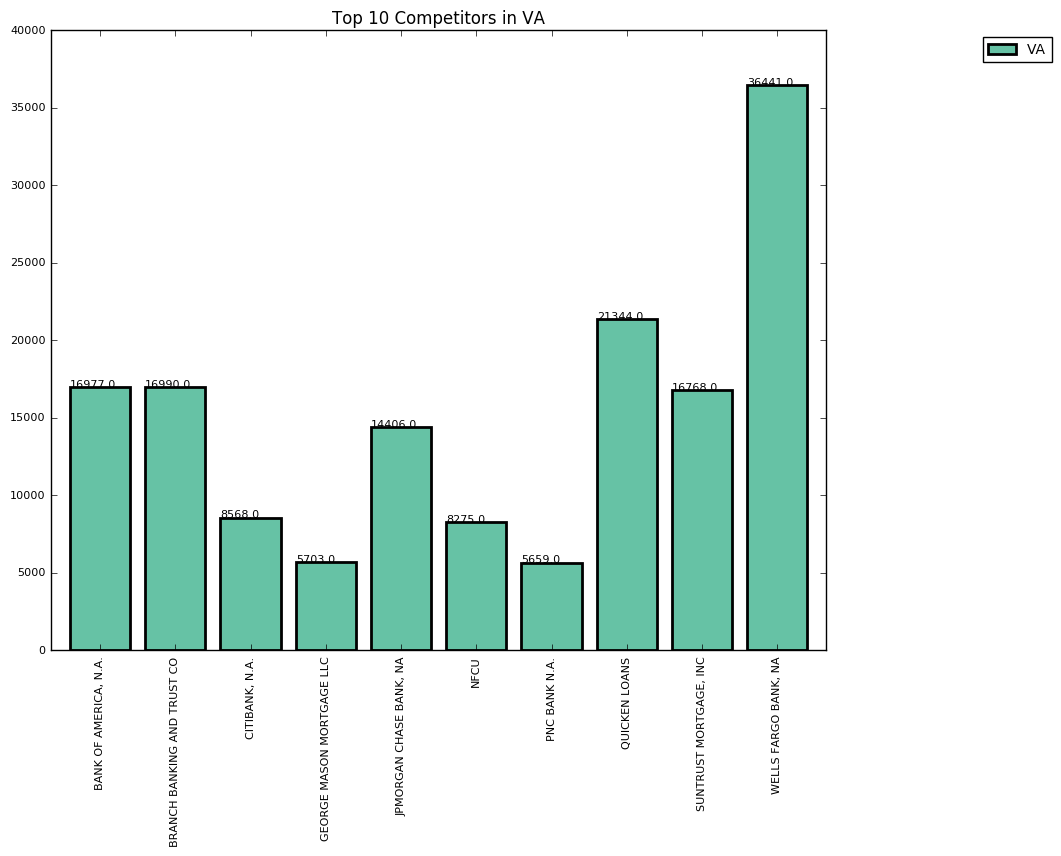

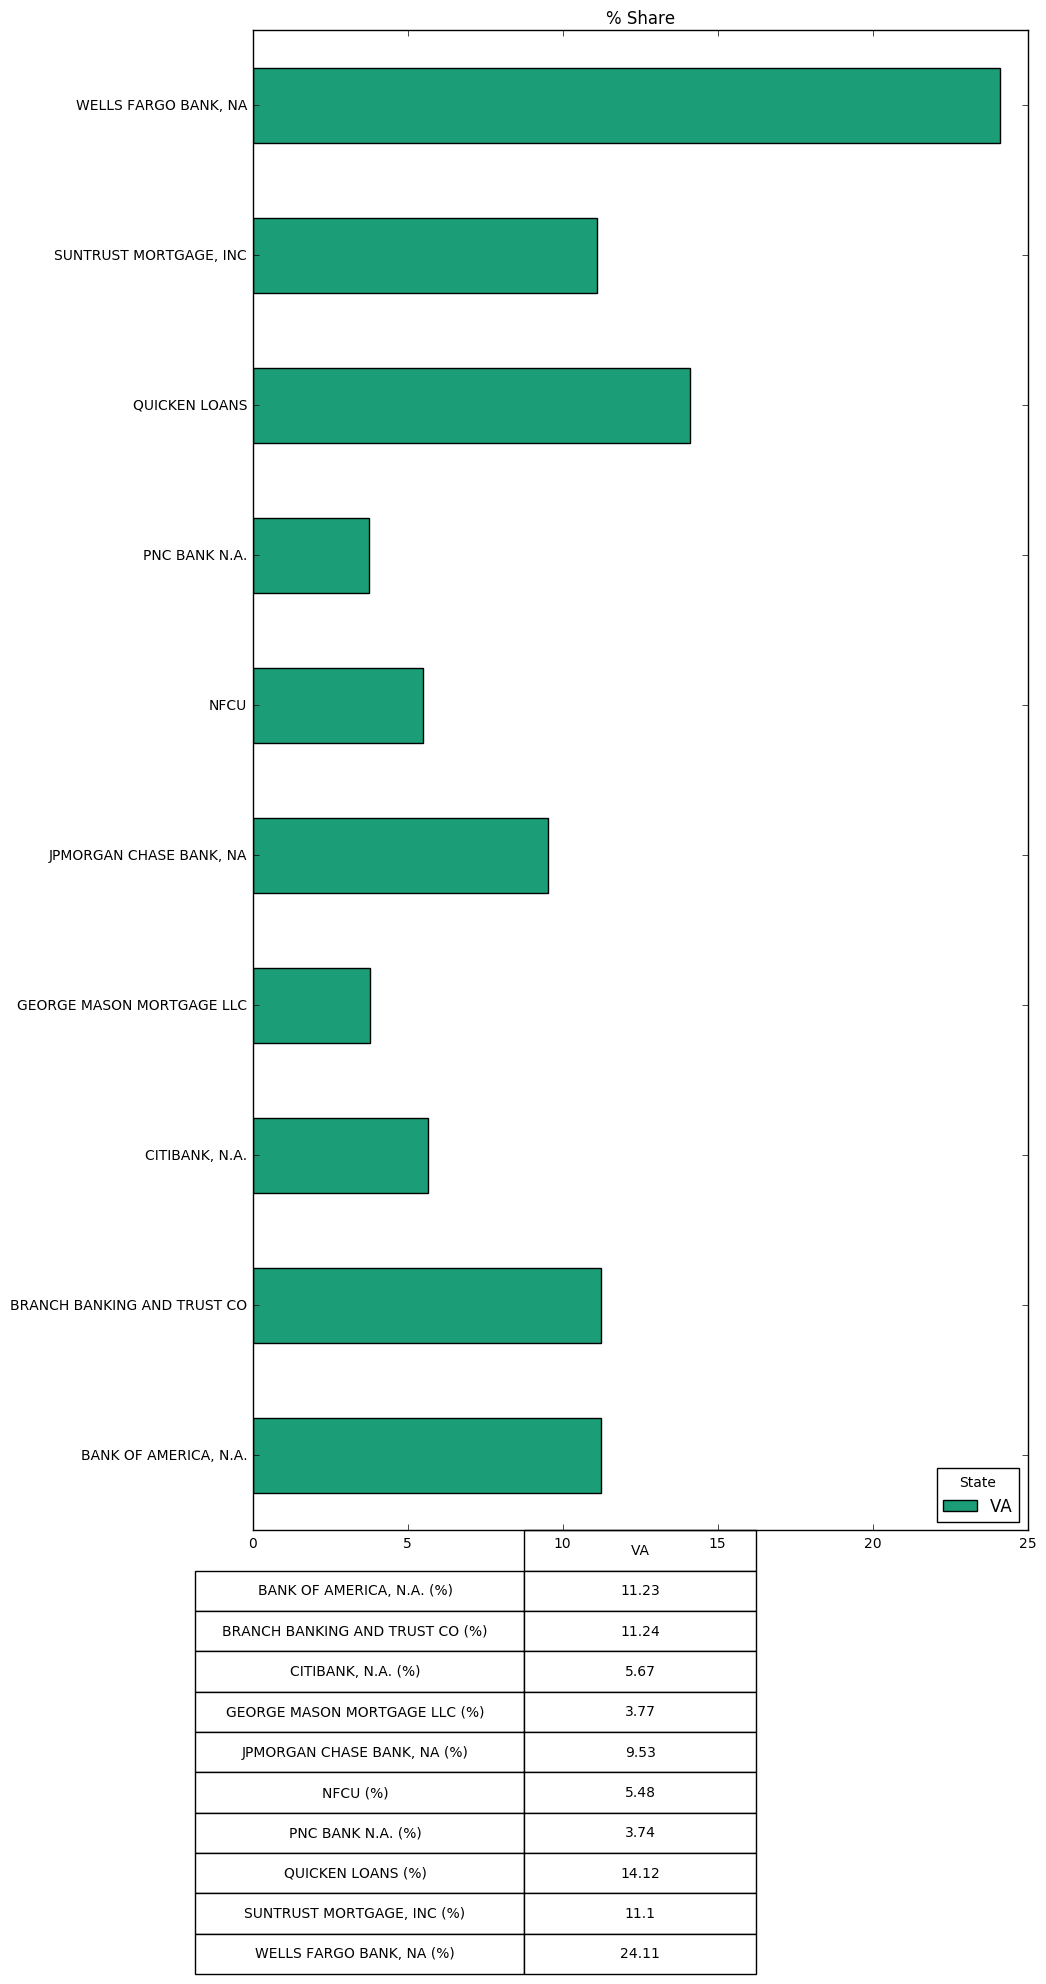

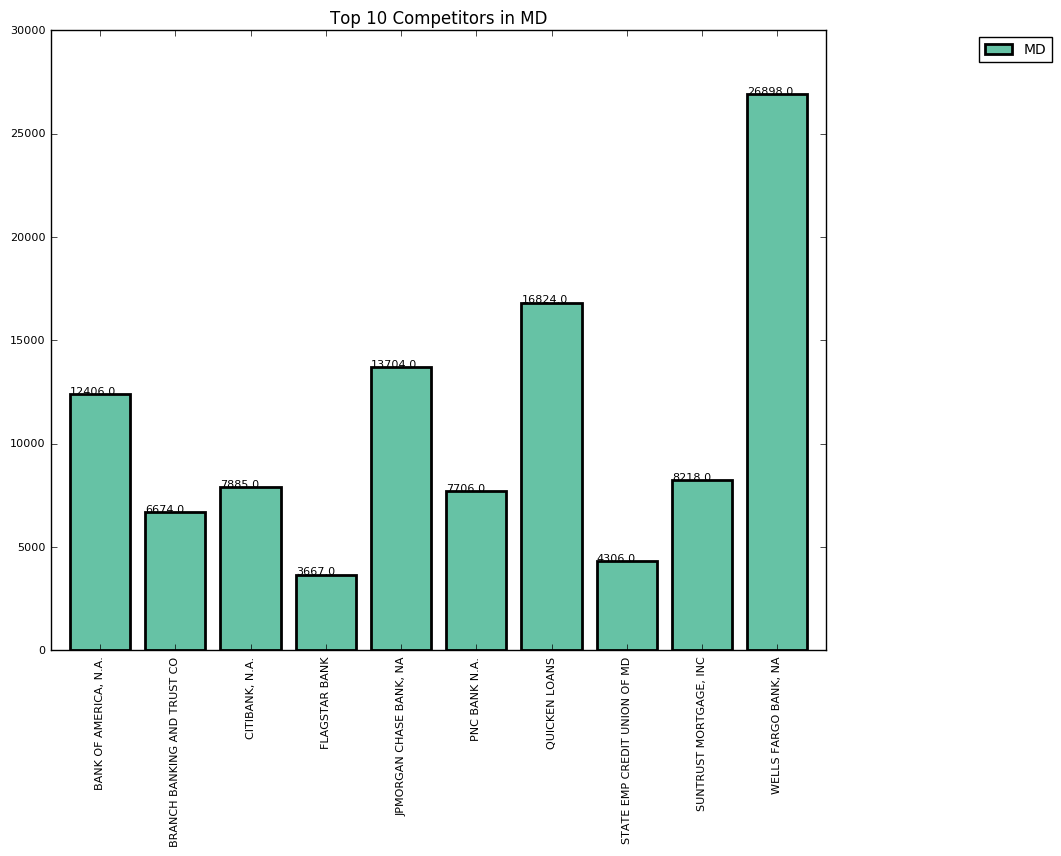

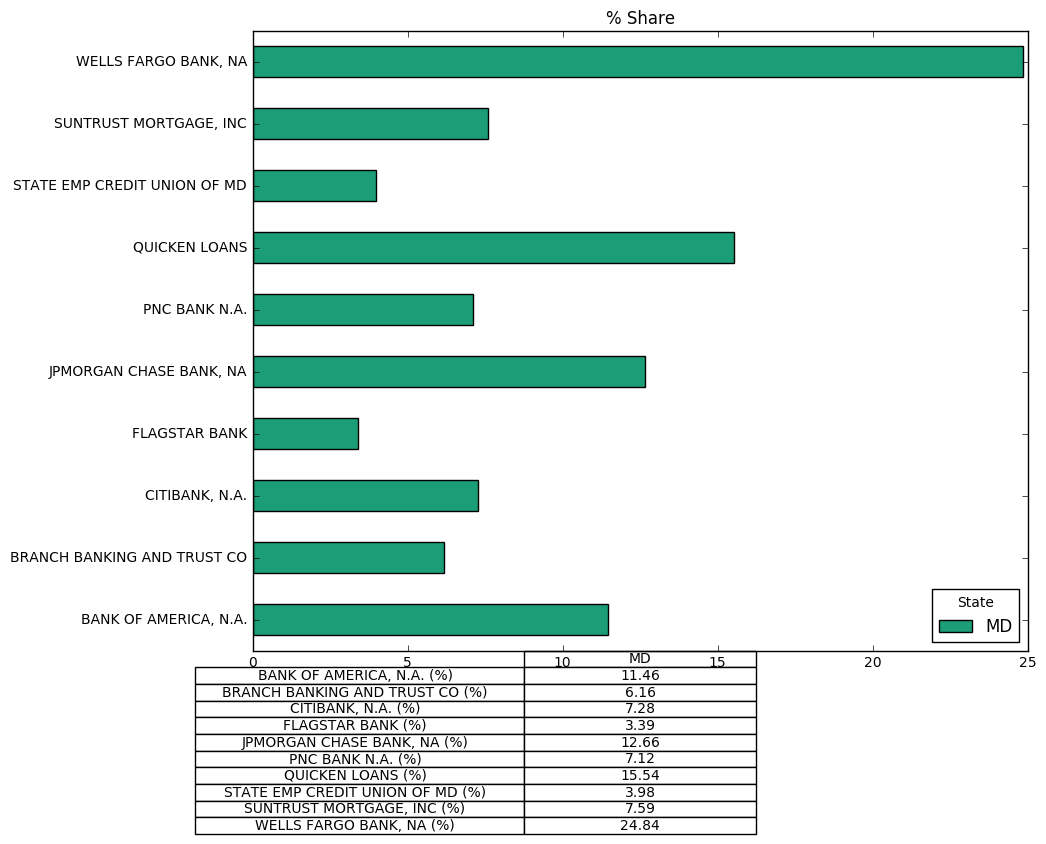

In [181]:
plot_graphs_complex(data[(data.Conventional_Conforming_Flag=='Y') & (data.Loan_Purpose_Description=='Refinance') & (data.State=='VA') ],'Respondent_Name_TS','State','Loan_Amount_000','bar','count',top_ten=True,percent_table=True,graph_title='Top 10 Competitors in VA')
plot_graphs_complex(data[(data.Conventional_Conforming_Flag=='Y') & (data.Loan_Purpose_Description=='Refinance') & (data.State=='MD') ],'Respondent_Name_TS','State','Loan_Amount_000','bar','count',top_ten=True,percent_table=True,graph_title='Top 10 Competitors in MD')
plt.show()